https://qiita.com/kazuya_minakuchi/items/0b0ba6ac7ee10c4eb6f6 の図を作ったコード

※ほとんど「機械学習のエッセンス: https://www.amazon.co.jp/gp/product/4797393963/ref=ppx_yo_dt_b_search_asin_title 」の写経

In [1]:
#必要なライブラリインポート
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, n_clusters, max_iter=1000, random_seed=0):
        self.n_clusters = n_clusters  #分けるクラスターの数
        self.max_iter = max_iter      #繰り返し計算の上限
        self.random_state = np.random.RandomState(random_seed)
    
    def fit(self, X, colors, markers):
        #最初は適当にラベルつける
        cycle = itertools.cycle(range(self.n_clusters))
        self.labels_ = np.fromiter(
            itertools.islice(cycle, X.shape[0]), dtype=np.int)
        self.random_state.shuffle(self.labels_)
        
        #ラベル更新前後での比較用(最初は0にしとく)
        labels_prev = np.zeros(X.shape[0])
        #各クラスターの重心(最初は0にしとく)
        self.cluster_centers_ = np.zeros(
            (self.n_clusters, X.shape[1]))
        count = 0
        #「更新しても分類が変わらない」or「繰り返し回数上限」で終了
        while (not (self.labels_ == labels_prev).all()
               and count < self.max_iter):
            labels_prev = self.labels_
            #現状の分類、重心をプロット
            for i in range(self.n_clusters):
                p = points[self.labels_ == i, :]
                plt.scatter(p[:, 0], p[:, 1], color=colors[i], marker=markers[i])
            plt.scatter(self.cluster_centers_[:, 0], self.cluster_centers_[:, 1], color="purple", marker="d")
            plt.show()
            #クラスターの重心を更新
            for i in range(self.n_clusters):
                XX = X[self.labels_ == i, :]
                self.cluster_centers_[i, :] = XX.mean(axis=0)
            #各点の、各クラスターからの距離計算
            dist = ((X[:, :, np.newaxis]
                     - self.cluster_centers_.T[np.newaxis, :, :])
                    ** 2).sum(axis=1)
            #ラベル更新(一番重心が近いクラスター)
            self.labels_ = dist.argmin(axis=1)
            count += 1
        
        def predict(self, X):
            dist = ((X[:, :, np.newaxis]
                     - self.cluster_centers_.T[np.newaxis, :, :])
                    ** 2).sum(axis=1)
            labels = dist.argmin(axis=1)
            return labels

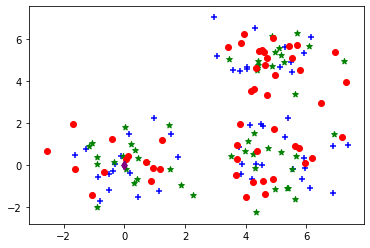

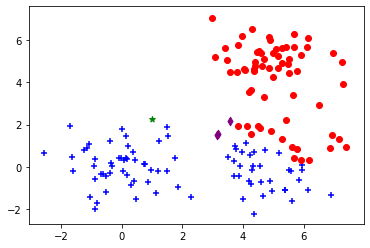

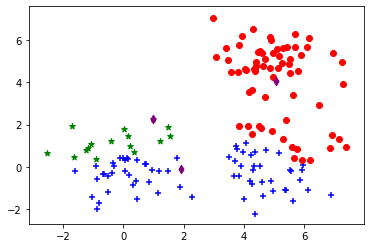

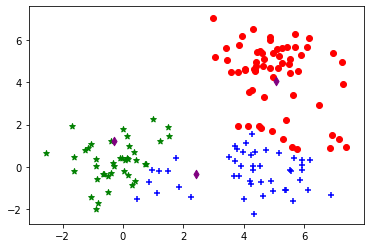

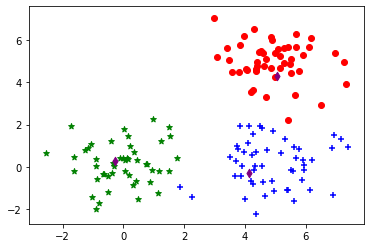

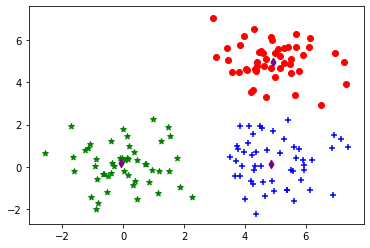

'\nfor i in range(3):\n    p = points[model.labels_ == i, :]\n    plt.scatter(p[:, 0], p[:, 1], color=colors[i], marker=markers[i])\nplt.show()\n'

In [3]:
np.random.seed(0)

#点作成
points1 = np.random.randn(50, 2)
points2 = np.random.randn(50, 2) + np.array([5, 0])
points3 = np.random.randn(50, 2) + np.array([5, 5])
points = np.r_[points1, points2, points3]
np.random.shuffle(points)

model = KMeans(3)
markers = ["+", "*", "o"]
colors = ["blue", "green", "red"]
model.fit(points, colors, markers)

"""
for i in range(3):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], color=colors[i], marker=markers[i])
plt.show()
""" 
